## Simulation of dual phosphorylation-dephosphorylation cycle using Spatiocyte and ODE solver

In [6]:
import math
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
from ecell4 import *
rng = GSLRandomNumberGenerator()

### Dual phosphorylation-dephosphorylation model and parameters

In [7]:
@species_attributes
def attrgen(radius, D):
    K | {"radius": radius, "D": D}
    Kp | {"radius": radius, "D": D}
    Kpp | {"radius": radius, "D": D}
    KK | {"radius": radius, "D": D}
    PP | {"radius": radius, "D": D}
    K_KK | {"radius": radius, "D": D}
    Kp_KK | {"radius": radius, "D": D}
    Kpp_PP | {"radius": radius, "D": D}
    Kp_PP | {"radius": radius, "D": D}
    C | {"radius": radius, "D": D}

@reaction_rules
def rulegen(kon1, koff1, kcat1, kon2, koff2, kcat2,k7):
    (KK + K == K_KK | (kon1, koff1)
        > Kp + KKa | kcat1)
    (KK + Kp == Kp_KK | (kon2, koff2)
        > Kpp + KKa | kcat2)
    (KKa > KK | k7)
    (Kpp + PP == Kpp_PP | (kon1, koff1)
        > Kp + PPa | kcat1)     
    (Kp + PP == Kp_PP | (kon2, koff2)
        > K + PPa | kcat2)
    (PPa > PP | k7)

@reaction_rules    
def rulegen2(kon1, koff1, kcat1, kcat2):
    (K + KK == K_KK | (kon1, koff1)
        > Kp_KK | kcat1
        > Kpp + KK | kcat2)

    (Kpp + PP == Kpp_PP | (kon1, koff1)
        > Kp + PP | kcat1
        > K + PP | kcat2)

ka1, kd1, kcat1 = 0.04483455086786913, 1.35, 1.5
ka2, kd2, kcat2 = 0.09299017957780264, 1.73, 15.0
trel = 1e-6
k7 = math.log(2)/trel
radius = 0.0025

### Simulator for Spatiocyte and ODE

In [8]:
def run(ratio,m,dur,NKT,NK): #Spatiocyte simulator
    voxelr = 1.0208582*radius
    w = spatiocyte.SpatiocyteWorld(Real3(1, 1, 1),voxelr,rng)
    w.bind_to(m)
    w.add_molecules(Species("K"), NK)
    w.add_molecules(Species("Kpp"), NKT-NK)
    Nppkk=int(60)
    npp = int(Nppkk/(ratio+1))
    nkk = Nppkk-npp
    w.add_molecules(Species("KK"), nkk)
    w.add_molecules(Species("PP"), npp)
    sim = spatiocyte.SpatiocyteSimulator(m, w)
    obs = FixedIntervalNumberObserver(5.0, ["KK","Kpp","PP"])
    sim.run(dur, [obs])
    data = np.array(obs.data()).T
    NKK = data[1]
    NKpp = data[2]
    NP = data[3]
    tt = data[0]
    return tt,NKK,NKpp,NP

def run_ode(ratio,m,dur,NKT,NK): #ODE simulator
    w = ode.ODEWorld(Real3(1, 1, 1))
    w.bind_to(m)
    w.add_molecules(Species("K"), NK)
    w.add_molecules(Species("Kpp"), NKT-NK)
    Nppkk=int(60)
    npp = int(Nppkk/(ratio+1))
    nkk = Nppkk-npp
    w.add_molecules(Species("KK"), nkk)
    w.add_molecules(Species("PP"), npp)
    sim = ode.ODESimulator(m,w)#simulator_type(m, w)
    obs = FixedIntervalNumberObserver(1.0, ["KK","Kpp","PP"])
    sim.run(dur, [obs])
    data = np.array(obs.data()).T
    NKK = data[1]
    NKpp = data[2]
    NP = data[3]
    tt = data[0]
    return tt,NKK,NKpp,NP

### Execute simulation

In [9]:
#spatiocyte simulator
ratios = np.logspace(-1.5,1.5,12)
NK= int(120*5)
NKT=int(120*5)
dur = 100 #duration
D=0.06

m = NetworkModel()
voxelr = 1.0208582*radius
for i, sp in enumerate(attrgen(str(voxelr), str(D))):
    m.add_species_attribute(sp)
rul = rulegen(ka1, kd1, kcat1, ka2, kd2, kcat2,k7)
for i, rr in enumerate(rul):
    reactants, products, k = rr.reactants(), rr.products(), rr.k()
    m.add_reaction_rule(rr)
xx = []
yy = []    
ratio=1.2
tt,NKK,NKpp,NP = run(ratio,m,dur,NKT,NK)
out=NKpp/NKT

#xx.append(ratio) #[kk]/[P]
#yy.append(np.mean(NKpp[int(dur*0.5):])/NKT) #[Kpp]/[K]total


0.5466666666666667

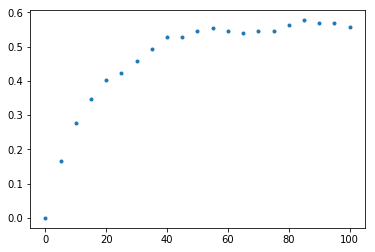

In [10]:
plt.plot(tt,out,'.')
idx=tt>30
np.mean(out[idx])

### Load and plot data used in the paper

In [11]:
idx=tt>40
np.mean(out[idx])

0.5529166666666666